In [1]:
# Import Libraries

from __future__ import print_function
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
feature = ['sepal length', 'sepal width', 'petal length', 'petal width']

# separating features
x = df.loc[:,feature]

# separating target
y = df.loc[:,'target']

#Standardising features
x = StandardScaler().fit_transform(x)

In [4]:
# Do the PCA.

n=4
pca = PCA(n_components=n)
pct = pca.fit_transform(x)

# Append the principle components for each entry to the dataframe
for i in range(n):
    df['PC' + str(i + 1)] = pct[:, i]

display(df.head())



,sepal length,sepal width,petal length,petal width,target,PC1,PC2,PC3,PC4
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.264542,0.505704,-0.121943,-0.023073
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.086426,-0.655405,-0.227251,-0.103208
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.367950,-0.318477,0.051480,-0.027825
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.304197,-0.575368,0.098860,0.066311
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.388777,0.674767,0.021428,0.037397


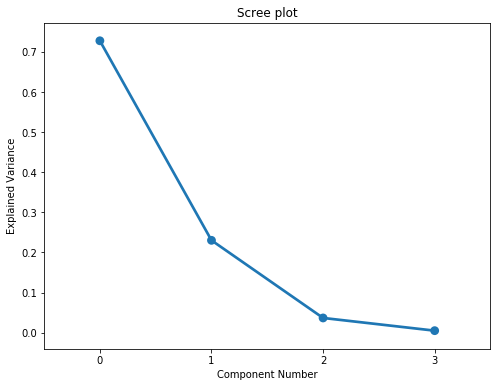

In [5]:
# Do a scree plot
ind = np.arange(n)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()




C:\Users\user\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


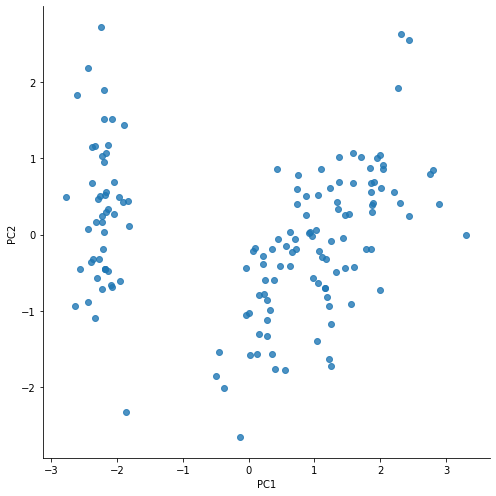

In [6]:
# Show the points in terms of the first two PCs
g = sns.lmplot('PC1',
               'PC2',
               data=df,
               fit_reg=False,
               scatter=True,
               size=7)

plt.show()

In [7]:
print(df.columns.values[0])
print(df.columns.values[1])
print(df.columns.values[2])
print(df.columns.values[3])

sepal length
sepal width
petal length
petal width


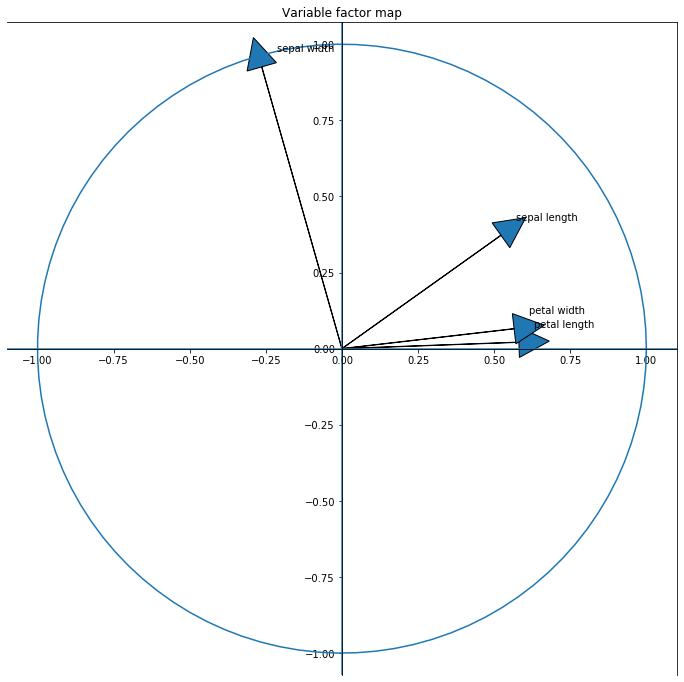

In [8]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(pca.components_)):          # Each PCA's number of features
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)
    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])                   

# Name of columns = Name of features

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')

ax.spines['left'].set_position('zero')  # 将左边框置于数据坐标原点
ax.spines['bottom'].set_position('zero')  # 将底边框置于数据坐标原点

plt.axvline(0)  #從原點畫個垂直線
plt.axhline(0)  #從原點畫個平行線


plt.show()

In [9]:
df2 = df[['PC1','PC2']]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2)
y_kmeans = kmeans.predict(df2)


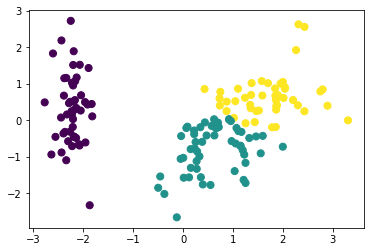

In [10]:
x = df['PC1'].astype('float32')
y = df['PC2'].astype('float32')
c = y_kmeans.astype('float32')

plt.scatter(x, y, c=c, s=50, cmap='viridis')


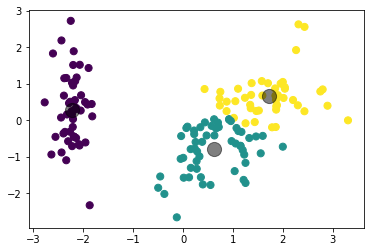

In [11]:
plt.scatter(x, y, c=c, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

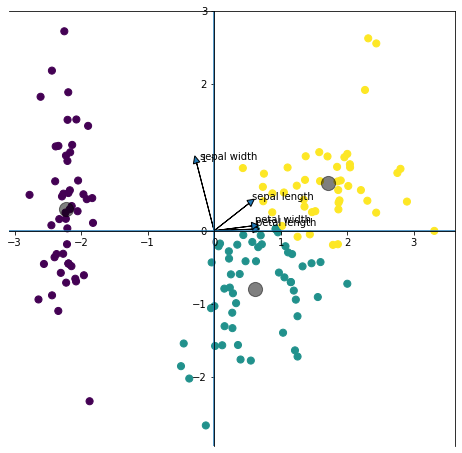

In [12]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, len(pca.components_)):          # Each PCA's number of features
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)
    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])                   

# Name of columns = Name of features

ax.spines['left'].set_position('zero')  # 将左边框置于数据坐标原点
ax.spines['bottom'].set_position('zero')  # 将底边框置于数据坐标原点

plt.axvline(0)  #從原點畫個垂直線
plt.axhline(0)  #從原點畫個平行線

plt.scatter(x, y, c=c, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

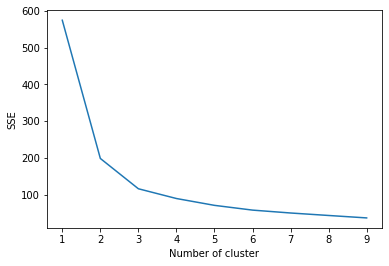

In [13]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df2)
    df2["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [33]:
df3.head()

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
grouping_by_clusters = df3.groupby('cluster')
grouping_by_clusters.head()

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
50,7.0,3.2,4.7,1.4,2
51,6.4,3.2,4.5,1.5,2
52,6.9,3.1,4.9,1.5,2
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [41]:
df00 = df3.loc[df['cluster'] == 0]
df00

df01 = df3.loc[df['cluster'] == 1]
df01

df02 = df3.loc[df['cluster'] == 2]
df02


,sepal length,sepal width,petal length,petal width,cluster
50,7.0,3.2,4.7,1.4,2
51,6.4,3.2,4.5,1.5,2
52,6.9,3.1,4.9,1.5,2
56,6.3,3.3,4.7,1.6,2
65,6.7,3.1,4.4,1.4,2
70,5.9,3.2,4.8,1.8,2
75,6.6,3.0,4.4,1.4,2
76,6.8,2.8,4.8,1.4,2
77,6.7,3.0,5.0,1.7,2
85,6.0,3.4,4.5,1.6,2


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df00['sepal length'] = MinMaxScaler().fit_transform(df00[['sepal length']])
df00['sepal width'] = MinMaxScaler().fit_transform(df00[['sepal length']])
df00['petal length'] = MinMaxScaler().fit_transform(df00[['petal length']])
df00['petal width'] = MinMaxScaler().fit_transform(df00[['petal width']])
df00



C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,sepal length,sepal width,petal length,petal width,cluster
0,0.533333,0.533333,0.444444,0.2,0
1,0.400000,0.400000,0.444444,0.2,0
2,0.266667,0.266667,0.333333,0.2,0
3,0.200000,0.200000,0.555556,0.2,0
4,0.466667,0.466667,0.444444,0.2,0
5,0.733333,0.733333,0.777778,0.6,0
6,0.200000,0.200000,0.444444,0.4,0
7,0.466667,0.466667,0.555556,0.2,0
8,0.066667,0.066667,0.444444,0.2,0
9,0.400000,0.400000,0.555556,0.0,0


In [44]:
df01['sepal length'] = MinMaxScaler().fit_transform(df01[['sepal length']])
df01['sepal width'] = MinMaxScaler().fit_transform(df01[['sepal length']])
df01['petal length'] = MinMaxScaler().fit_transform(df01[['petal length']])
df01['petal width'] = MinMaxScaler().fit_transform(df01[['petal width']])
df01

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,sepal length,sepal width,petal length,petal width,cluster
53,0.333333,0.333333,0.357143,0.214286,1
54,0.888889,0.888889,0.571429,0.357143,1
55,0.444444,0.444444,0.535714,0.214286,1
57,0.000000,0.000000,0.107143,0.000000,1
58,0.944444,0.944444,0.571429,0.214286,1
59,0.166667,0.166667,0.321429,0.285714,1
60,0.055556,0.055556,0.178571,0.000000,1
61,0.555556,0.555556,0.428571,0.357143,1
62,0.611111,0.611111,0.357143,0.000000,1
63,0.666667,0.666667,0.607143,0.285714,1


In [45]:
df02['sepal length'] = MinMaxScaler().fit_transform(df02[['sepal length']])
df02['sepal width'] = MinMaxScaler().fit_transform(df02[['sepal length']])
df02['petal length'] = MinMaxScaler().fit_transform(df02[['petal length']])
df02['petal width'] = MinMaxScaler().fit_transform(df02[['petal width']])
df02

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,sepal length,sepal width,petal length,petal width,cluster
50,0.55,0.55,0.12,0.000000,2
51,0.25,0.25,0.04,0.090909,2
52,0.50,0.50,0.20,0.090909,2
56,0.20,0.20,0.12,0.181818,2
65,0.40,0.40,0.00,0.000000,2
70,0.00,0.00,0.16,0.363636,2
75,0.35,0.35,0.00,0.000000,2
76,0.45,0.45,0.16,0.000000,2
77,0.40,0.40,0.24,0.272727,2
85,0.05,0.05,0.04,0.181818,2


In [46]:
mean_df00 = df00.mean()
mean_df00


sepal length    0.470667
sepal width     0.470667
petal length    0.515556
petal width     0.288000
cluster         0.000000
dtype: float64

In [47]:
mean_df01 = df01.mean()
mean_df01

sepal length    0.516162
sepal width     0.516162
petal length    0.504545
petal width     0.306494
cluster         1.000000
dtype: float64

In [48]:
mean_df02 = df02.mean()
mean_df02

sepal length    0.445556
sepal width     0.445556
petal length    0.443556
petal width     0.525253
cluster         2.000000
dtype: float64

In [55]:
list_mean_df00 = mean_df00.tolist() 
list_mean_df01 = mean_df01.tolist() 
list_mean_df02 = mean_df02.tolist()

In [56]:
list_mean_df00
list_mean_df01
list_mean_df02

[0.4455555555555554,
 0.4455555555555554,
 0.4435555555555554,
 0.5252525252525251,
 2.0]

In [15]:
mean_clusters.drop('cluster', axis=1, inplace=True)
mean_clusters

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.006000,3.418000,1.464000,0.244000
1,5.829091,2.670909,4.412727,1.429091
2,6.791111,3.117778,5.508889,1.977778


In [16]:
categories = ['sepal length', 'sepal width', 'petal length', 'petal width']
N = len(categories)
values_0 = df3.iloc[0, :5]
values_0
cluster0 = np.array(values_0.tolist())

In [17]:
print(values_0)
cluster0 = cluster0.tolist()
print(cluster0)

sepal length    5.1
sepal width     3.5
petal length    1.4
petal width     0.2
cluster         0.0
Name: 0, dtype: float64
[5.1, 3.5, 1.4, 0.2, 0.0]


In [18]:
values_0 = df3.iloc[0, :4]
values_0

cluster0 = values_0.tolist()
cluster0 = cluster0.pop(4)


IndexError: pop index out of range

In [19]:
cluster0

[5.1, 3.5, 1.4, 0.2]

In [20]:
values_1 = df3.iloc[1, :4]
values_1

cluster1 = values_1.tolist()
cluster1 = cluster1.pop(4)
cluster1

IndexError: pop index out of range

In [21]:
cluster1

[4.9, 3.0, 1.4, 0.2]

In [22]:
values_2 = df3.iloc[2, :4]
values_2

cluster2 = values_2.tolist()
cluster2 = cluster2.pop(4)
cluster2

IndexError: pop index out of range

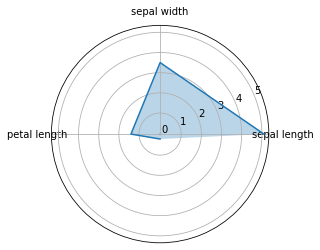

In [23]:
from math import pi

categories = ['sepal length', 'sepal width', 'petal length', 'petal width']
N = len(categories)

angles0 = [n / float(N)*2*pi for n in range(N)]

plt.polar(angles0, cluster0)
# color the area inside

plt.fill(angles0, cluster0, alpha=0.3)
plt.xticks(angles0[:-1], categories)


plt.show()